# КОДИИМ Буткемп

## Лекция 2

### Polina Polunina & Boris Kovarsky
polina.polunina@skolkovotech.ru

# 1. Linear Regression and Classification Tutorial


Import packages:

In [6]:
#linear algebra
import numpy as np
#data structures
import pandas as pd
#ml models
import scipy as sp
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
#plots
import matplotlib.pyplot as plt
%matplotlib inline
#beautiful plots
import seaborn as sns
#linear regression
import statsmodels.api as sm
#set style for plots
sns.set_style('darkgrid')
#off the warnings
import warnings
warnings.filterwarnings("ignore")

## 1.1 Simple Linear Regression
Simple Linear Regression - Модель парной регрессии - регрессия с одной переменной

Подгружаем датасет:
* **SalePrice** - The property's sale price in dollars. Это целевая переменная (зависимая переменная), которую мы будем пытаться предсказать
* **GrLivArea** - Above grade (ground) living area square feet - Это независимая переменная (предиктор)


In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/kondratevakate/machine-learning-with-love/master/02_lr/train.csv',
                   index_col = 0, usecols=['Id', 'GrLivArea', 'SalePrice'])

Давайте посмотрим на наши данные:

In [9]:
data.head()

,GrLivArea,SalePrice
Id,,
1,1710,208500
2,1262,181500
3,1786,223500
4,1717,140000
5,2198,250000


In [4]:
data.describe()

,GrLivArea,SalePrice
count,1460.000000,1460.000000
mean,1515.463699,180921.195890
std,525.480383,79442.502883
min,334.000000,34900.000000
25%,1129.500000,129975.000000
50%,1464.000000,163000.000000
75%,1776.750000,214000.000000
max,5642.000000,755000.000000


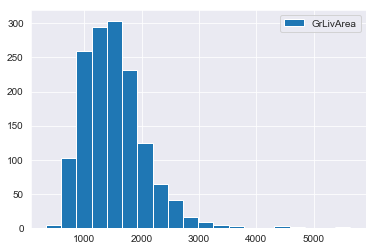

In [5]:
data.GrLivArea.hist(bins=20, label='GrLivArea')
plt.legend()
plt.show()

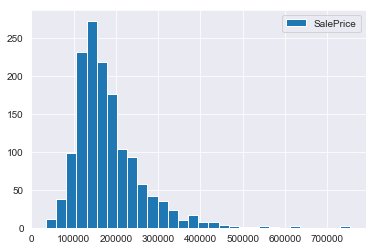

In [6]:
data.SalePrice.hist(bins=30, label='SalePrice')
plt.legend()
plt.show()

In [7]:
data.SalePrice.quantile(0.95)

326099.99999999994

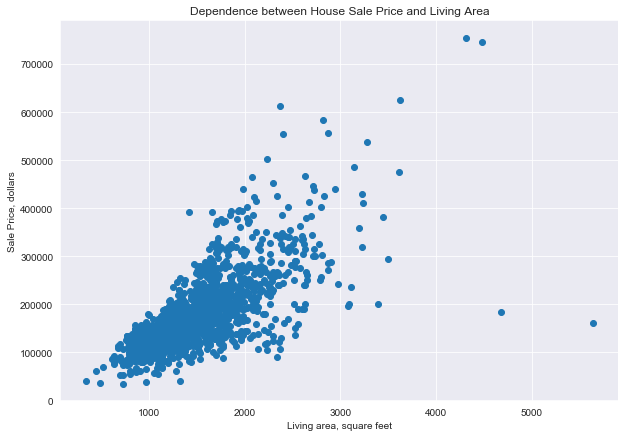

In [8]:
#set figsize of the plot
plt.figure(figsize = (10,7))
#scatter plot of the data
plt.scatter(data.GrLivArea, data.SalePrice)
#text for x axis
plt.xlabel('Living area, square feet')
#text for y axis
plt.ylabel('Sale Price, dollars')
#text for the plot title
plt.title('Dependence between House Sale Price and Living Area')
#show the plot
plt.show()

### Как смоделировать эту зависимость?

### Построение модели

* Y = SalePrice - целевая, зависимая переменная
* X = GrLivArea - предиктор, независимая переменная

**Модель**

Мы хотим найти прямую, которая наилучшим образом оторбражает зависимость между Sale Price и Living Area

$Y = aX + b + \epsilon$


Для начала построим модель ровно с одним параметром.

Считая $b=0$, $Y=ax +\epsilon$

In [23]:
X = data.GrLivArea
Y = data.SalePrice
#define the model
model = sm.OLS(Y, X)
#fit the model
results = model.fit()

In [25]:
#plot the summary of our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                          1.647e+04
Date:                Mon, 19 Feb 2024   Prob (F-statistic):                        0.00
Time:                        08:24:40   Log-Likelihood:                         -18043.
No. Observations:                1460   AIC:                                  3.609e+04
Df Residuals:                    1459   BIC:                                  3.609e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GrLivArea    118.0691      0.920    128.337      0.000     116.264     119.874
==============================================================================
Omnibus:                      242.301   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4400.101
Skew:                          -0.041   Prob(JB):                         0.00
Kurtosis:                      11.504   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
results.params

GrLivArea    118.0691
dtype: float64

Согласно нашим рассчетам

$$a=\frac{\sum xy}{\sum x^2}$$

Давайте проверим это:

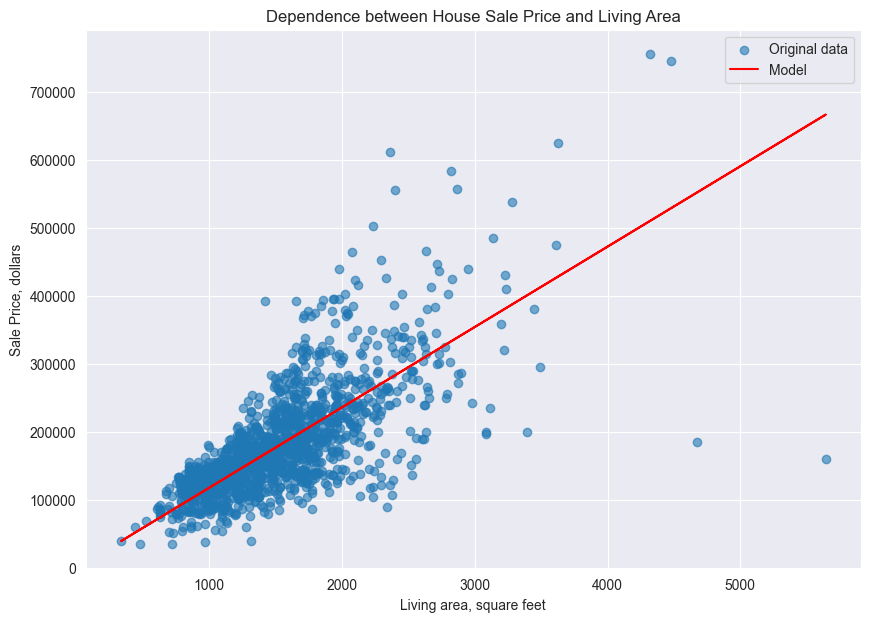

In [31]:
#set size of the plot
plt.figure(figsize = (10,7))
#scatter plot of the data
plt.scatter(data.GrLivArea, data.SalePrice, alpha=0.6, label = 'Original data')
#plot of the found regression line
plt.plot(data.GrLivArea.values, 118.0691 * data.GrLivArea.values, color = 'red', label='Model')
#text for x axis
plt.xlabel('Living area, square feet')
#text for y axis
plt.ylabel('Sale Price, dollars')
#text for the plot title
plt.title('Dependence between House Sale Price and Living Area')
plt.legend()
#show the plot
plt.show()

Усложним модель, добавив константу

In [34]:
X = data.GrLivArea
Y = data.SalePrice
#define the model
X = sm.add_constant(X)
model = sm.OLS(Y, X)
# X = sm.add_constant(X)
#fit the model
results = model.fit()

In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Mon, 19 Feb 2024   Prob (F-statistic):          4.52e-223
Time:                        08:36:38   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
results.params

const        18569.025856
GrLivArea      107.130359
dtype: float64

#### Как хорошо найденная функция описывает реальную зависимость?
**Y = 18569.0259 + 107.1304 * X**

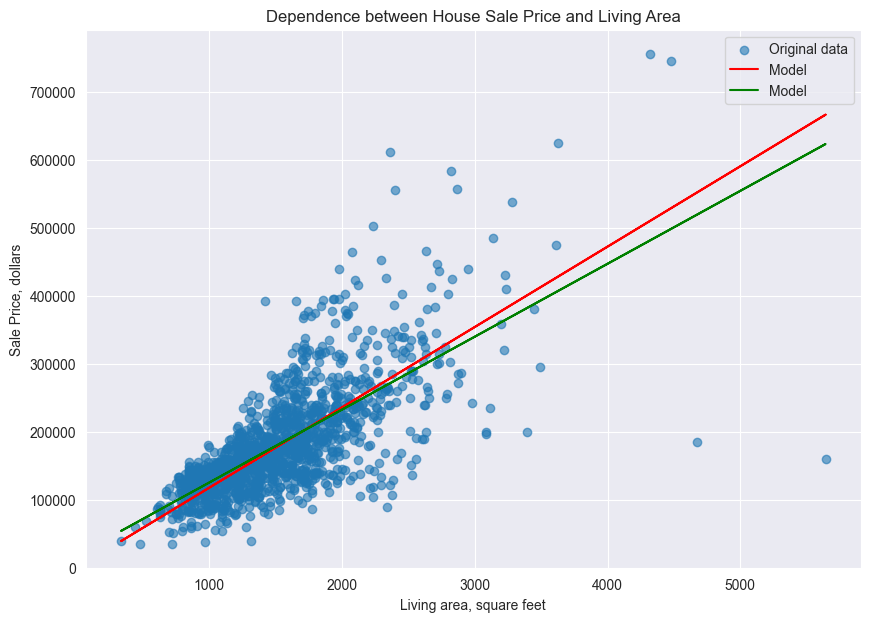

In [33]:
#set size of the plot
plt.figure(figsize = (10,7))
#scatter plot of the data
plt.scatter(data.GrLivArea, data.SalePrice, alpha=0.6, label = 'Original data')
#plot of the found regression lines
plt.plot(data.GrLivArea.values, 118.0691 * data.GrLivArea.values, color = 'red', label='Model')
plt.plot(data.GrLivArea.values, 18569.0259 + 107.1304 * data.GrLivArea.values, color = 'green', label='Model')
#text for x axis
plt.xlabel('Living area, square feet')
#text for y axis
plt.ylabel('Sale Price, dollars')
#text for the plot title
plt.title('Dependence between House Sale Price and Living Area')
plt.legend()
#show the plot
plt.show()

#### Оценка подгонки регрессии и $R^2$ 

Очередное напоминание из вашего курса статистики =)

$R^2$ - это **коэффициент детерминации**, одна из наиболее популярных метрик для задачи регрессии, в том числе, для линейной регрессии

В случае линейной регрессии, $R^2$ определяется следующим образом:

* $y_i$ - наблюдаемые значения целевой переменной
* $\hat{y_i}$ - предсказываемые моделью значения целевой переменной
* $\overline{y} = \frac{1}{n}\sum_{i=1}^{n}y_i$ - среднее по наблюдаемым значениям целевой переменной
* $SS_{tot} = \sum_{i}(y_i - \overline{y})^2$ - общая сумма квадратов (total sum of squares, TSS)
* $SS_{reg} = \sum_{i}(\hat{y_i} - \overline{y})^2$ - explained sum of squares, ESS
* $SS_{res} = \sum_{i}(y_i - \hat{y_i})^2 = \sum_{i}residual_i^2$ - residual sum of squares, RSS

$R^2 = \frac{SS_{reg}}{SS_{tot}} = 1 - \frac{SS_{res}}{SS_{tot}}$ - доля объясненной дисперсии (ratio of the explained variance)

$R^2$ лежит в интервале [0, 1]

В нашей модели $R^2 = 0.502$, т.е. только половина от дисперсии объяснена 

**Note:** $R^2$ нестабилен, т.к. увеличивается вместе с добавлением новых данных, поэтому лучше смотреть на $R^2_{adjusted}$

### Попробуем сделать лучше?

Давайте возьмем логарифмы от X и Y. Тогда модель будет выглядеть так: **$ln(Y) = a*ln(X) + b + \epsilon$**

In [12]:
X = data.GrLivArea
Y = data.SalePrice
X=np.log(X)
Y=np.log(Y)
#add the constant term to the data
X = sm.add_constant(X)
#define the model
model = sm.OLS(Y, X)
#fit the model
results = model.fit()

In [15]:
#plot the summary of our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Mon, 19 Feb 2024   Prob (F-statistic):          4.52e-223
Time:                        08:20:34   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#set size of the plot
plt.figure(figsize = (10,7))
#scatter plot of the data
plt.scatter(np.log(data.GrLivArea), np.log(data.SalePrice), alpha=0.6, label = 'Original data')
#plot of the found regression line
plt.plot(np.log(data.GrLivArea.values), 5.6681 + 0.8745 * np.log(data.GrLivArea.values), color = 'orchid', label='Model')
#text for x axis
plt.xlabel('log(Living area), square feet')
#text for y axis
plt.ylabel('log(Sale Price), dollars')
#text for the plot title
plt.title('Dependence between log(House Sale Price) and log(Living Area)')
plt.legend()
#show the plot
plt.show()

## 1.2 Multiple Linear Regression (Модель множественной линейной регрессии)

In [15]:
cols=['Id', 'MSSubClass', 'LotArea', 'OverallQual',\
      'OverallCond', 'YearBuilt', 'YearRemodAdd',\
      'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',\
     'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',\
     'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',\
     'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',\
     'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',\
     'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

In [16]:
data = pd.read_csv('train.csv', index_col=0, usecols=cols)
data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,150,856,856,854,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,284,1262,1262,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,434,920,920,866,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,540,756,961,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,490,1145,1145,1053,...,192,84,0,0,0,0,0,12,2008,250000


Проверка на пропуски в данных (nan):

### Определяем модель

In [18]:
X = data.drop('SalePrice', axis=1)
Y = data.SalePrice
#add the constant term to the data
X = sm.add_constant(X)
#define the model
model = sm.OLS(Y, X)
#fit the model
results = model.fit()

Вычисляем некоторые статистические параметры:

In [19]:
#together with the intercept
k = X.shape[1]
#total number of observations
n = X.shape[0]
#degrees of freedom for the model:
df_model = k - 1
#degrees of freedom of the error:
df_error = n - k
print(' the number of paraters to estimate: {} \n total number of observations: {} \n degrees of freedom of the model: {} \n degrees of freedom of the errors: {}'\
      .format(k, n, df_model, df_error))

 the number of paraters to estimate: 31 
 total number of observations: 1460 
 degrees of freedom of the model: 30 
 degrees of freedom of the errors: 1429


Посчитаем ранг матрицы наблюдений Х:

## 2. Logistic Regression

Подгружаем датасет:

In [144]:
X, Y = sklearn.datasets.load_iris(return_X_y=True)
names = ['sepal length', 'sepal width', 'petal length', 'petal width']
classes = ['setosa', 'versicolor', 'virginica']
#create pandas object
X = pd.DataFrame(X, columns=names)
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Целевая переменная уже закодирована:
    * 0 - Setosa
    * 1 - Versicolor
    * 2 - Verginica
    
<img style="float: left;" src="iris.jpg" br>


Описательные статистики:

In [37]:
X.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


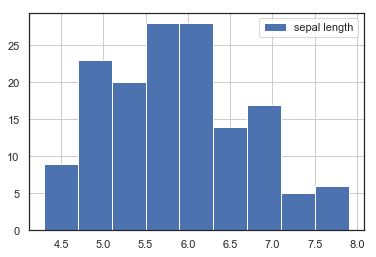

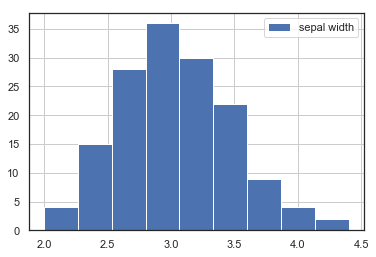

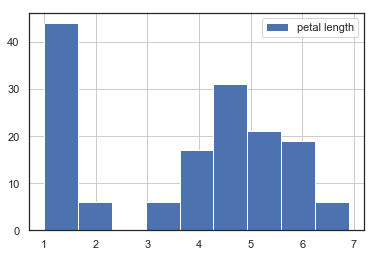

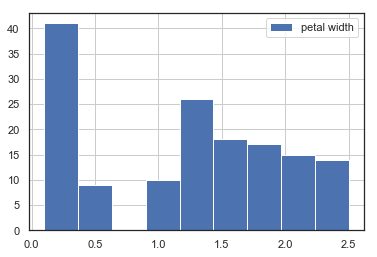

In [38]:
for name in names:
    X[name].hist(bins=9, label=name)
    plt.legend()
    plt.show()

Корреляция:

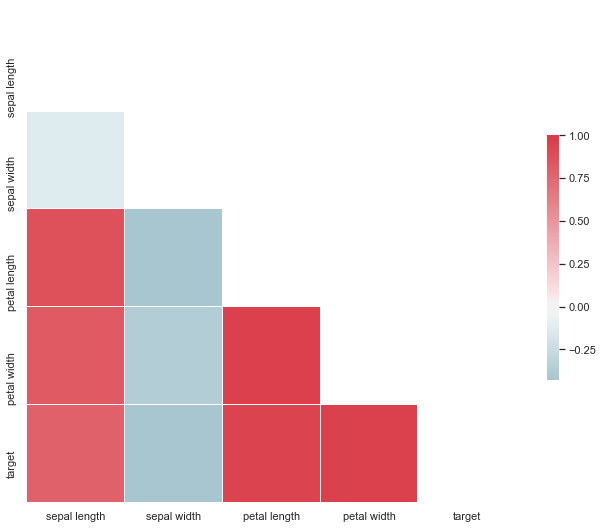

In [145]:
dt=pd.concat([X,pd.DataFrame(Y, columns=['target'])], axis=1)
sns.set(style="white")

# Compute the correlation matrix
corr = dt.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Еще несколько красивых графиков:

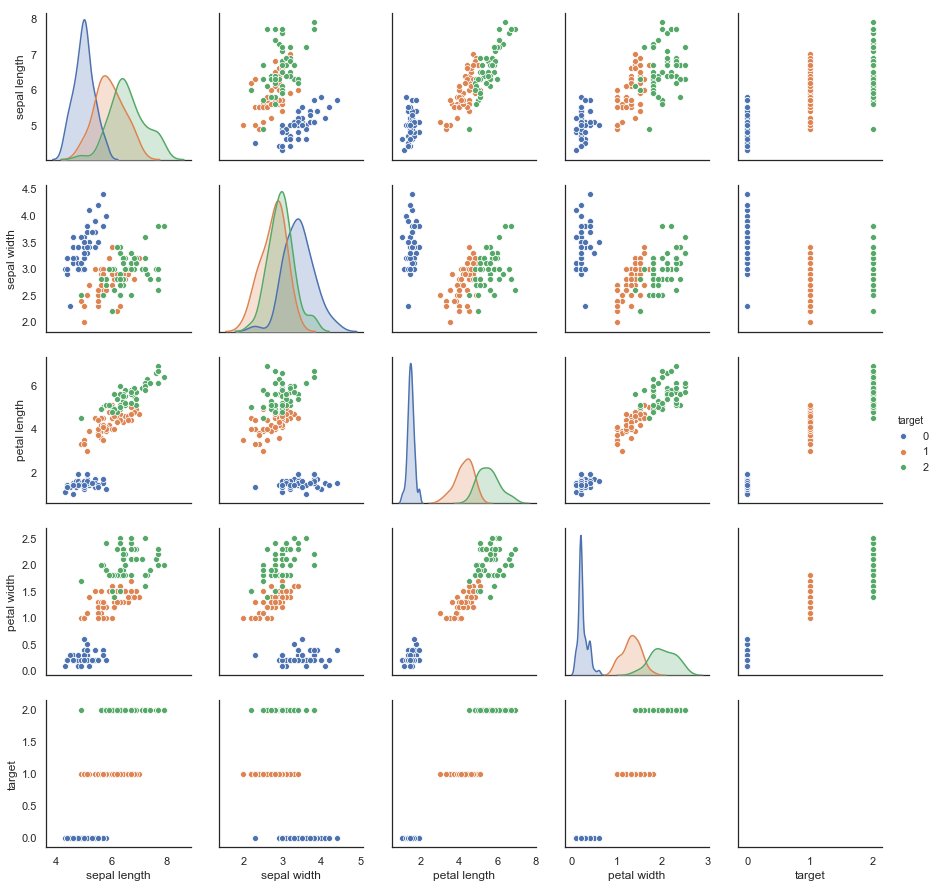

In [148]:
sns.pairplot(dt, kind='scatter', hue='target')
plt.show()

[]

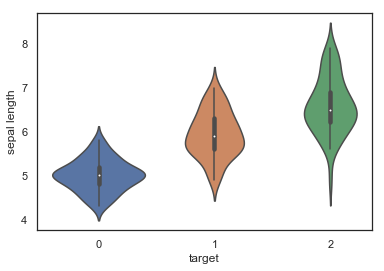

In [41]:
sns.violinplot( x=dt["target"], y=dt["sepal length"])
plt.plot()

Считаем ранг матрицы признаков:

In [149]:
np.linalg.matrix_rank(X)

4

In [150]:
#from sklearn import metrics 
logit = sm.MNLogit(Y, X)
result = logit.fit()
preds=np.argmax(result.predict(X).values,axis=1)
accuracy_score(Y,preds)

         Current function value: 0.072266
         Iterations: 35


0.9666666666666667

**Logistic regression with L1 regularization**

In [44]:
from sklearn import linear_model
model=sklearn.linear_model.LogisticRegression(penalty='l1',multi_class='multinomial', solver='saga').fit(X,Y)
preds=model.predict(X)
accuracy_score(Y, preds)

0.98

**Logistic regression with L2 regularization**

In [45]:
from sklearn import linear_model
model=sklearn.linear_model.LogisticRegression(penalty='l2',multi_class='multinomial', solver='saga', fit_intercept=True).fit(X,Y)
preds=model.predict(X)
accuracy_score(Y, preds)

0.9866666666666667

In [46]:
solvers=['newton-cg', 'sag', 'saga', 'lbfgs']
for solver in solvers:
    model=sklearn.linear_model.LogisticRegression(penalty='l2',multi_class='multinomial', solver=solver, fit_intercept=True).fit(X,Y)
    preds=model.predict(X)
    print(solver, accuracy_score(Y, preds))

newton-cg 0.9733333333333334
sag 0.9866666666666667
saga 0.9866666666666667
lbfgs 0.9733333333333334


### Анализируем результаты

**Визуальный анализ**

### Task 3: 
* постройте точечные диаграммы (scatter plots) любых двух признаков из X
    * a) используйте настоящие значения целевой переменной в качестве цветовой разметки
    * b) используйте предсказанные значения в качестве цветовой разметки
    
**Hint:** используйте sns.lmplot  

* найдите как минимум две неправильно классифицированные точки

**Confusion matrix**

### Task 4:
* прочитайте про confusion matrix (https://en.wikipedia.org/wiki/Confusion_matrix)
* посчитайте и нарисуйте ее (https://scikit-learn.org/0.20/auto_examples/model_selection/plot_confusion_matrix.html)

### Task 5: Постройте (любую) модель логистической регрессии для двух классов: versicolor и virginica
* 0) постройте график парных зависимостей и сделайте цветовую разметку по значениям целевой переменной
* a) сформируйте новый датасет, соответствующий поставленной задаче (удалите все, что относится к классу setosa)
* b) постройте модель
* c) выведите на экран accuracy score